## Importing the required libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Input, Flatten, Dropout, Activation, Conv1D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
import librosa
import librosa.display
import numpy as npF
import matplotlib.pyplot as plt


In [2]:
from keras import regularizers

In [3]:
import os

In [4]:
import os
import shutil

# Define the path to the RawData directory and the new folder
raw_data_path = 'RawData/'
new_folder_path = 'AllAudioFiles/'

# Create a new directory to store all audio files if it doesn't exist
if not os.path.exists(new_folder_path):
    os.makedirs(new_folder_path)

# Get the list of subfolders (RAVDEES, SAVEE)
subfolders = os.listdir(raw_data_path)

# Loop through the subfolders and copy audio files to the new folder
for subfolder in subfolders:
    subfolder_path = os.path.join(raw_data_path, subfolder)  # Full path to the subfolder
    
    if os.path.isdir(subfolder_path):  # Check if it's a directory
        print(f"Copying audio files from {subfolder}...")
        
        # Iterate over each subfolder inside RAVDEES and SAVEE
        for root, dirs, files in os.walk(subfolder_path):  # Walk through subdirectories
            for file in files:
                if file.endswith('.wav'):  # Check if the file is an audio file
                    source_file = os.path.join(root, file)  # Full path to the source file
                    destination_file = os.path.join(new_folder_path, file)  # Destination path
                    
                    # Copy the file to the new folder
                    shutil.copy(source_file, destination_file)

print(f"All audio files have been copied to {new_folder_path}")


Copying audio files from Ravdess...
Copying audio files from Savee...
All audio files have been copied to AllAudioFiles/


In [6]:
mylist=[]
type(mylist)

list

In [7]:
mylist= os.listdir('AllAudioFiles/')
print(mylist[1800])

KL_a01.wav


In [8]:
print(mylist[96][6:-16])

02


## Plotting the audio file's waveform and its spectrogram

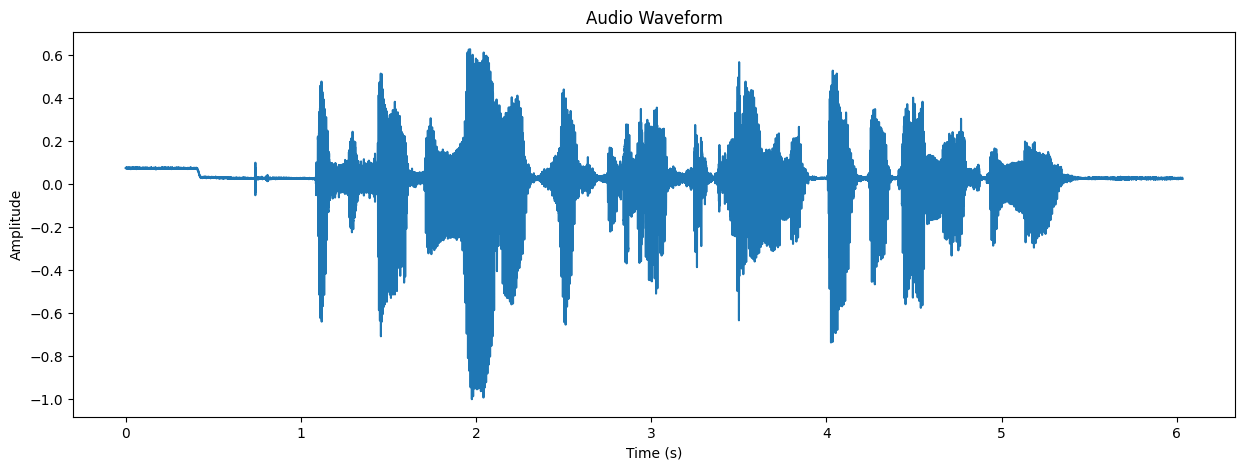

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Load the audio file using scipy
sampling_rate, data = wavfile.read('AllAudioFiles/JE_d15.wav')

# Create the plot
plt.figure(figsize=(15, 5))

# Plot the waveform (scaling data to float between -1 and 1)
plt.plot(np.linspace(0, len(data) / sampling_rate, num=len(data)), data / np.max(np.abs(data)))

# Set labels and title
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Audio Waveform')

# Display the plot
plt.show()


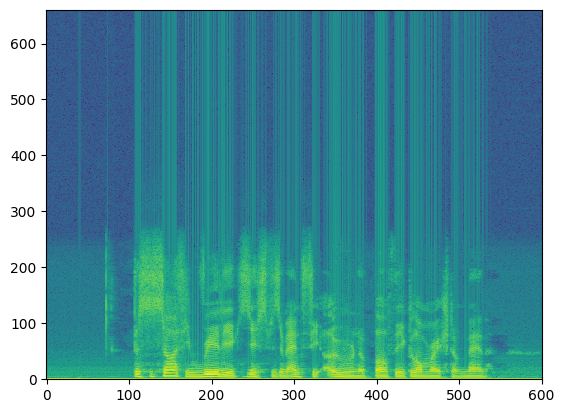

In [10]:
import matplotlib.pyplot as plt
import scipy.io.wavfile
import numpy as np
import sys


sr,x = scipy.io.wavfile.read('AllAudioFiles\JE_d15.wav')

## Parameters: 10ms step, 30ms window
nstep = int(sr * 0.01)
nwin  = int(sr * 0.03)
nfft = nwin

window = np.hamming(nwin)

## will take windows x[n1:n2].  generate
## and loop over n2 such that all frames
## fit within the waveform
nn = range(nwin, len(x), nstep)

X = np.zeros( (len(nn), nfft//2) )

for i,n in enumerate(nn):
    xseg = x[n-nwin:n]
    z = np.fft.fft(window * xseg, nfft)
    X[i,:] = np.log(np.abs(z[:nfft//2]))

plt.imshow(X.T, interpolation='nearest',
    origin='lower',
    aspect='auto')

plt.show()

## Setting the labels

In [11]:
feeling_list = []

for item in mylist:
    # For RAVDESS Dataset
    if item[6:-16] == '02' and int(item[18:-4]) % 2 == 0:  # Female calm
        feeling_list.append('female_calm')
    elif item[6:-16] == '02' and int(item[18:-4]) % 2 == 1:  # Male calm
        feeling_list.append('male_calm')
    elif item[6:-16] == '03' and int(item[18:-4]) % 2 == 0:  # Female happy
        feeling_list.append('female_happy')
    elif item[6:-16] == '03' and int(item[18:-4]) % 2 == 1:  # Male happy
        feeling_list.append('male_happy')
    elif item[6:-16] == '04' and int(item[18:-4]) % 2 == 0:  # Female sad
        feeling_list.append('female_sad')
    elif item[6:-16] == '04' and int(item[18:-4]) % 2 == 1:  # Male sad
        feeling_list.append('male_sad')
    elif item[6:-16] == '05' and int(item[18:-4]) % 2 == 0:  # Female angry
        feeling_list.append('female_angry')
    elif item[6:-16] == '05' and int(item[18:-4]) % 2 == 1:  # Male angry
        feeling_list.append('male_angry')
    elif item[6:-16] == '06' and int(item[18:-4]) % 2 == 0:  # Female fearful
        feeling_list.append('female_fearful')
    elif item[6:-16] == '06' and int(item[18:-4]) % 2 == 1:  # Male fearful
        feeling_list.append('male_fearful')
    elif item[6:-16] == '07' and int(item[18:-4]) % 2 == 0:  # Female disgust
        feeling_list.append('female_disgust')
    elif item[6:-16] == '07' and int(item[18:-4]) % 2 == 1:  # Male disgust
        feeling_list.append('male_disgust')
    elif item[6:-16] == '08' and int(item[18:-4]) % 2 == 0:  # Female surprised
        feeling_list.append('female_surprised')
    elif item[6:-16] == '08' and int(item[18:-4]) % 2 == 1:  # Male surprised
        feeling_list.append('male_surprised')
    elif item[6:-16] == '01' and int(item[18:-4]) % 2 == 0:  # Female neutral
        feeling_list.append('female_neutral')
    elif item[6:-16] == '01' and int(item[18:-4]) % 2 == 1:  # Male neutral
        feeling_list.append('male_neutral')

    # For SAVEE Dataset (single letter identification for gender and emotion)
    elif item[:1] == 'a':  # Angry emotion
        feeling_list.append('male_angry')  # Assuming male if 'a'
    elif item[:1] == 'f':  # Fearful emotion
        feeling_list.append('male_fearful')  # Assuming male if 'f'
    elif item[:1] == 'h':  # Happy emotion
        feeling_list.append('male_happy')  # Assuming male if 'h'
    elif item[:2] == 'sa':  # Sad emotion
        feeling_list.append('male_sad')  # Assuming male if 'sa'
    elif item[:2] == 'su':  # Surprised emotion
        feeling_list.append('male_surprised')  # Assuming male if 'su'
    elif item[:1] == 'n':  # Neutral emotion
        feeling_list.append('male_neutral')  # Assuming male if 'n'
    elif item[:1] == 'd':  # Disgust emotion
        feeling_list.append('male_disgust')  # Assuming male if 'd'



In [13]:
import pandas as pd
labels = pd.DataFrame(feeling_list)


In [14]:
labels[:500]

,0
0,male_neutral
1,female_neutral
2,male_neutral
3,female_neutral
4,male_neutral
...,...
495,female_sad
496,male_sad
497,female_sad
498,male_sad


## Getting the features of audio files using Scipy


In [66]:
import librosa

df = pd.DataFrame(columns=['feature'])
bookmark=0
for index,y in enumerate(mylist):
    if mylist[index][6:-16]!='01' and mylist[index][6:-16]!='07' and mylist[index][6:-16]!='08' and mylist[index][:2]!='su' and mylist[index][:1]!='n' and mylist[index][:1]!='d':
        X, sample_rate = librosa.load('AllAudioFiles/'+y, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                            sr=sample_rate, 
                                            n_mfcc=13),
                        axis=0)
        feature = mfccs
        #[float(i) for i in feature]
        #feature1=feature[:135]
        df.loc[bookmark] = [feature]
        bookmark=bookmark+1        

In [67]:
df[:5]

,feature
0,"[-70.26808, -70.26808, -70.26808, -70.26808, -..."
1,"[-65.707375, -65.707375, -63.11476, -61.5191, ..."
2,"[-65.48282, -65.48282, -65.48282, -65.48282, -..."
3,"[-64.52863, -64.52863, -64.52863, -64.52863, -..."
4,"[-63.64624, -59.995125, -61.87015, -67.49628, ..."


In [68]:
df3 = pd.DataFrame(df['feature'].values.tolist())

df3[:5]

In [69]:
newdf = pd.concat([df3,labels], axis=1)

In [70]:
rnewdf = newdf.rename(index=str, columns={"0": "label"})

In [71]:
rnewdf[:5]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
0,-70.268082,-70.268082,-70.268082,-70.268082,-70.268082,-70.268082,-70.268082,-70.268082,-70.268082,-70.268082,...,-57.447964,-58.897030,-58.751503,-57.406185,-60.078960,-63.427284,-62.639057,-61.242519,-61.356304,male_neutral
1,-65.707375,-65.707375,-63.114761,-61.519100,-61.097507,-63.424744,-63.720127,-56.854958,-55.169304,-54.640343,...,-39.792603,-40.614014,-41.209988,-41.439613,-43.994671,-49.399967,-50.591972,-49.112217,-48.155739,female_neutral
2,-65.482819,-65.482819,-65.482819,-65.482819,-65.482819,-65.482819,-65.482819,-65.482819,-65.482819,-65.482819,...,-31.348970,-34.310616,-35.803104,-35.938644,-37.633038,-40.119911,-41.663399,-41.552986,-41.974155,male_neutral
3,-64.528633,-64.528633,-64.528633,-64.528633,-64.528633,-64.528633,-64.528633,-64.528633,-64.528633,-65.928391,...,-48.674786,-48.596626,-47.603218,-43.049660,-42.660038,-43.189026,-44.001690,-43.328537,-42.985413,female_neutral
4,-63.646240,-59.995125,-61.870152,-67.496277,-71.072220,-65.680321,-63.394951,-65.503853,-61.858971,-60.007896,...,-39.072914,-41.896790,-40.866905,-38.293262,-36.375126,-37.914906,-40.027390,-43.315861,-44.848808,male_neutral


In [72]:
from sklearn.utils import shuffle
rnewdf = shuffle(newdf)
rnewdf[:10]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
889,-50.249943,-50.249943,-50.249943,-50.255623,-50.314640,-50.416019,-50.496723,-50.364815,-49.938950,-48.833031,...,-47.588310,-47.472328,-48.161846,-48.074585,-47.586605,-47.317875,-47.287457,-46.981876,-47.917213,female_fearful
196,-58.709446,-56.691975,-57.946842,-58.112026,-55.473167,-56.331829,-57.309334,-60.093075,-59.959450,-58.217014,...,-33.844975,-33.636608,-33.726250,-34.900723,-38.408104,-38.195751,-38.507072,-37.905575,-33.507404,male_calm
229,-55.912479,-55.912479,-55.912479,-55.912479,-55.912479,-55.912479,-55.912479,-55.912479,-55.912479,-55.912479,...,-54.049839,-53.751125,-53.950336,-53.864704,-55.673035,-55.545387,-55.862129,-55.912479,-55.912479,female_calm
448,-52.862045,-50.297615,-49.708420,-53.008198,-52.668404,-52.429222,-52.042072,-50.351303,-49.606514,-48.956863,...,-52.824993,-53.651161,-54.524235,-54.553589,-55.576653,-54.387352,-51.498161,-52.745888,-55.972370,male_happy
355,-47.371418,-47.371418,-47.371418,-47.371418,-47.371418,-47.371418,-47.371418,-47.371418,-47.371418,-47.371418,...,-47.039875,-47.331482,-47.371418,-47.371418,-47.176353,-47.371418,-47.371418,-47.371418,-47.371418,female_happy
981,-9.005583,-13.032242,-21.473186,-22.129587,-21.843113,-19.182249,-19.342968,-17.836632,-14.248284,-10.900229,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female_fearful
1201,-8.486193,-12.258006,-22.464539,-21.925383,-21.525034,-21.747852,-22.579144,-22.473600,-13.029365,-3.608032,...,-23.846767,-23.867451,-25.314442,-24.120338,-25.423552,-25.774557,-22.357969,-19.651234,-13.883055,female_disgust
407,-64.689117,-64.689117,-64.689117,-64.689117,-64.689117,-64.689117,-64.689117,-64.689117,-64.689117,-64.689117,...,-41.175129,-40.629757,-39.392441,-38.810898,-40.025005,-40.117592,-41.502804,-36.643703,-31.926394,female_happy
758,-43.507359,-43.315971,-43.914543,-43.914543,-43.914543,-43.486076,-43.896584,-43.602867,-43.914543,-43.914543,...,-40.425827,-40.812912,-41.540134,-42.023640,-42.644043,-42.186668,-41.791443,-40.848476,-40.251183,male_angry
12,-64.977608,-62.009243,-59.612736,-57.940331,-61.090103,-60.685852,-62.597713,-68.624084,-69.007576,-66.854279,...,-63.206490,-60.799644,-60.709835,-56.783989,-55.976212,-61.551456,-63.806217,-60.685600,-57.012241,male_neutral


In [73]:
rnewdf=rnewdf.fillna(0)

## Dividing the data into test and train

In [74]:
newdf1 = np.random.rand(len(rnewdf)) < 0.8
train = rnewdf[newdf1]
test = rnewdf[~newdf1]

In [75]:
train[250:260]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
821,-63.375122,-61.009460,-60.393532,-60.479393,-61.317410,-64.020103,-60.963615,-60.685181,-62.826859,-62.177471,...,-58.343952,-61.135880,-60.476467,-57.457504,-55.493618,-56.426872,-60.389137,-63.704323,-61.368813,female_angry
1043,-8.914434,-12.820999,-13.370518,-10.317570,-8.874782,-9.444794,-11.390955,-11.273218,-11.554915,-10.636805,...,-7.703697,-7.279914,-6.865207,-7.122467,-6.658171,-7.009432,-7.980868,-8.565458,-6.426826,female_fearful
34,-66.146324,-56.576275,-54.119465,-55.746223,-55.997902,-55.565292,-55.623657,-56.577393,-55.227444,-55.989056,...,-48.737473,-48.932983,-49.597916,-51.275921,-55.083782,-57.042488,-56.337822,-56.371140,-57.252113,male_neutral
798,-64.457130,-64.289673,-63.854065,-64.193428,-63.725967,-63.491005,-63.156414,-63.427841,-62.722527,-61.840939,...,-54.487480,-54.231045,-53.384830,-53.846008,-54.257359,-52.946751,-53.508385,-52.940254,-53.225258,male_angry
1350,-18.686361,-19.525299,-24.775486,-24.995434,-23.706383,-22.975513,-23.823711,-25.516201,-26.594622,-25.730400,...,-39.101246,-40.234280,-40.459770,-40.795689,-42.279129,-37.397083,-32.737404,-26.819216,-21.170725,male_surprised
1053,-8.815257,-13.081695,-25.749269,-28.361427,-28.149984,-25.618164,-24.337921,-24.256718,-25.115543,-25.459963,...,-10.935062,-9.750463,-9.587934,-9.649479,-9.323285,-11.095328,-12.312101,-8.329161,-1.089815,female_fearful
677,-40.526352,-40.105862,-39.746841,-39.590454,-39.849045,-40.558918,-40.764240,-40.560207,-40.211815,-39.646915,...,-29.928028,-31.677296,-34.206470,-35.389236,-36.694241,-37.695469,-37.735214,-26.469534,-17.566074,female_angry
1074,0.057032,-1.490475,-4.883737,-5.158271,-3.341194,-2.235361,-4.353156,-5.886156,-6.241341,-7.478525,...,-7.084619,-11.973125,-16.368309,-9.421675,-7.101644,-7.024421,-3.667111,1.203869,4.437281,male_disgust
849,-50.777702,-48.768414,-49.005241,-48.636963,-48.924282,-51.221355,-52.455105,-53.027885,-52.261002,-52.068771,...,-50.464008,-49.197029,-47.613998,-49.389694,-49.665543,-48.309208,-47.910667,-47.111816,-50.350105,female_angry
141,-69.054764,-69.054764,-66.796783,-61.570866,-59.909203,-59.762650,-59.613274,-56.008110,-52.305256,-49.519161,...,-44.783245,-46.804459,-48.943882,-50.600857,-49.604099,-49.770103,-50.546711,-51.069412,-53.810024,female_calm


In [76]:
trainfeatures = train.iloc[:, :-1]

In [77]:
trainlabel = train.iloc[:, -1:]

In [78]:
testfeatures = test.iloc[:, :-1]

In [79]:
testlabel = test.iloc[:, -1:]

In [118]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

X_train = np.array(trainfeatures)
y_train = np.array(trainlabel).reshape(-1, 1)  
X_test = np.array(testfeatures)
y_test = np.array(testlabel).reshape(-1, 1)  

lb = LabelEncoder()

y_train = to_categorical(lb.fit_transform(y_train.ravel()))  
y_test = to_categorical(lb.fit_transform(y_test.ravel()))  


In [119]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [120]:
X_train.shape

(1167, 216)

## Changing dimension for CNN model

In [121]:

from tensorflow.keras.utils import to_categorical
import numpy as np

x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)


In [122]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Activation, Dense, Flatten, Dropout, MaxPooling1D
from tensorflow.keras.optimizers import RMSprop

model = Sequential()

model.add(Conv1D(256, 5, padding='same', input_shape=(216, 1)))
model.add(Activation('relu'))
model.add(Conv1D(128, 5, padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=8))
model.add(Conv1D(128, 5, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 5, padding='same'))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(16))  
model.add(Activation('softmax'))

# Corrected RMSprop optimizer with 'learning_rate'
opt = RMSprop(learning_rate=0.00001)

C:\Users\shiva\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [123]:
model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_62 (Conv1D)                   │ (None, 216, 256)            │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_77 (Activation)           │ (None, 216, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_63 (Conv1D)                   │ (None, 216, 128)            │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_78 (Activation)           │ (None, 216, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 216, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_15 (MaxPooling1D)      │ (None, 27, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_64 (Conv1D)                   │ (None, 27, 128)             │          82,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_79 (Activation)           │ (None, 27, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_65 (Conv1D)                   │ (None, 27, 128)             │          82,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_80 (Activation)           │ (None, 27, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_15 (Flatten)                 │ (None, 3456)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 16)                  │          55,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_81 (Activation)           │ (None, 16)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 384,912 (1.47 MB)

 Trainable params: 384,912 (1.47 MB)

 Non-trainable params: 0 (0.00 B)

In [125]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

### Removed the whole training part for avoiding unnecessary long epochs list

In [ ]:
cnnhistory = model.fit(x_traincnn, y_train, batch_size=16, epochs=700, validation_data=(x_testcnn, y_test))

Epoch 1/700
73/73 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.0630 - loss: 3.0194 - val_accuracy: 0.0989 - val_loss: 2.6933
Epoch 2/700
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.0855 - loss: 2.6932 - val_accuracy: 0.0952 - val_loss: 2.6421
Epoch 3/700
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.1077 - loss: 2.6357 - val_accuracy: 0.1172 - val_loss: 2.6071
Epoch 4/700
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.1275 - loss: 2.5739 - val_accuracy: 0.1648 - val_loss: 2.5581
Epoch 5/700
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.1625 - loss: 2.5344 - val_accuracy: 0.1795 - val_loss: 2.5348
Epoch 6/700
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.1889 - loss: 2.4726 - val_accuracy: 0.1905 - val_loss: 2.4999
Epoch 7/700
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.2147 - loss: 2.4236 - val_accuracy: 0.1795 - val_loss: 2.4489
Epoch 8/700
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.1963 - loss: 2.3975 - val_accuracy: 0.

In [111]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

NameError: name 'cnnhistory' is not defined

## Saving the model

In [112]:
model_name = 'Emotion_Voice_Detection_Model.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at C:\Users\mites\Documents\Cognitive\Final Exam\saved_models\Emotion_Voice_Detection_Model.h5 


In [133]:
import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

## Loading the model

In [137]:
# loading json and creating model
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("saved_models/Emotion_Voice_Detection_Model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
acc: 72.73%


## Predicting emotions on the test data

In [138]:
preds = loaded_model.predict(x_testcnn, 
                         batch_size=32, 
                         verbose=1)

319/319 [==============================] - 0s     


In [139]:
preds

array([[  3.49815641e-12,   1.18043589e-10,   1.13181663e-19, ...,
          1.80016723e-05,   7.36836637e-06,   1.14132257e-04],
       [  3.87504338e-16,   5.73074694e-23,   1.31673211e-14, ...,
          1.75147681e-04,   1.85760673e-05,   9.99805748e-01],
       [  8.39285008e-07,   3.43896300e-11,   5.38965035e-03, ...,
          9.93317604e-01,   1.99900052e-04,   1.05243188e-03],
       ..., 
       [  3.49616457e-04,   1.94651744e-04,   6.65218568e-06, ...,
          1.67340226e-02,   6.44345134e-02,   9.10043001e-01],
       [  4.23396705e-06,   1.59581254e-11,   6.03030126e-12, ...,
          6.36715861e-03,   9.64888096e-01,   2.34207995e-02],
       [  3.69524572e-31,   0.00000000e+00,   0.00000000e+00, ...,
          5.24333927e-07,   9.99998808e-01,   6.36476927e-10]], dtype=float32)

In [115]:
preds1=preds.argmax(axis=1)

In [116]:
preds1

array([6, 9, 7, 1, 7, 8, 1, 2, 5, 8, 7, 1, 9, 9, 4, 0, 5, 0, 5, 8, 4, 1, 5,
       9, 7, 5, 7, 1, 7, 5, 8, 1, 8, 9, 2, 2, 1, 8, 6, 0, 5, 9, 1, 0, 7, 5,
       5, 7, 7, 0, 0, 7, 0, 0, 6, 5, 3, 7, 5, 8, 5, 4, 8, 8, 9, 7, 2, 8, 6,
       1, 5, 6, 8, 6, 5, 3, 4, 8, 8, 9, 9, 0, 8, 9, 4, 5, 0, 0, 5, 5, 7, 9,
       4, 7, 8, 6, 9, 5, 6, 8, 1, 7, 0, 8, 8, 7, 3, 2, 7, 8, 7, 9, 7, 9, 5,
       7, 8, 6, 0, 1, 6, 9, 1, 5, 8, 7, 1, 8, 6, 9, 3, 7, 7, 4, 6, 5, 8, 8,
       1, 0, 5, 0, 7, 6, 5, 7, 4, 9, 2, 5, 4, 7, 5, 6, 8, 5, 5, 4, 8, 8, 2,
       7, 5, 7, 6, 9, 8, 9, 9, 0, 2, 5, 7, 8, 3, 0, 4, 6, 6, 9, 9, 9, 3, 8,
       1, 7, 2, 5, 8, 1, 8, 4, 4, 8, 5, 2, 9, 9, 5, 6, 0, 5, 9, 0, 8, 7, 4,
       6, 6, 3, 9, 5, 9, 6, 1, 7, 5, 7, 8, 4, 9, 2, 5, 6, 6, 4, 2, 1, 8, 2,
       7, 5, 7, 3, 5, 6, 8, 7, 1, 6, 0, 0, 4, 7, 4, 4, 4, 4, 4, 0, 8, 1, 6,
       7, 4, 8, 7, 8, 2, 9, 6, 2, 7, 8, 3, 9, 9, 7, 2, 5, 7, 2, 9, 5, 5, 7,
       8, 5, 6, 8, 1, 2, 5, 9, 4, 5, 5, 6, 7, 8, 7, 0, 9, 5, 9, 5, 9, 7, 8,
       1, 2,

In [117]:
abc = preds1.astype(int).flatten()

In [118]:
predictions = (lb.inverse_transform((abc)))

In [119]:
preddf = pd.DataFrame({'predictedvalues': predictions})
preddf[:10]

,predictedvalues
0,male_calm
1,male_sad
2,male_fearful
3,female_calm
4,male_fearful
5,male_happy
6,female_calm
7,female_fearful
8,male_angry
9,male_happy


In [120]:
actual=y_test.argmax(axis=1)
abc123 = actual.astype(int).flatten()
actualvalues = (lb.inverse_transform((abc123)))

In [121]:
actualdf = pd.DataFrame({'actualvalues': actualvalues})
actualdf[:10]

,actualvalues
0,male_calm
1,male_sad
2,male_fearful
3,female_fearful
4,male_fearful
5,male_happy
6,female_calm
7,female_angry
8,male_angry
9,male_happy


In [122]:
finaldf = actualdf.join(preddf)

## Actual v/s Predicted emotions

In [128]:
finaldf[170:180]

,actualvalues,predictedvalues
170,female_fearful,female_fearful
171,male_angry,male_angry
172,male_fearful,male_fearful
173,male_happy,male_happy
174,female_happy,female_happy
175,female_angry,female_angry
176,female_angry,female_sad
177,male_sad,male_calm
178,male_angry,male_calm
179,male_sad,male_sad


In [129]:
finaldf.groupby('actualvalues').count()

,predictedvalues
actualvalues,
female_angry,21
female_calm,20
female_fearful,19
female_happy,17
female_sad,20
male_angry,55
male_calm,25
male_fearful,55
male_happy,49


In [130]:
finaldf.groupby('predictedvalues').count()

,actualvalues
predictedvalues,
female_angry,25
female_calm,22
female_fearful,19
female_happy,9
female_sad,25
male_angry,51
male_calm,29
male_fearful,51
male_happy,50


In [131]:
finaldf.to_csv('Predictions.csv', index=False)

## Live Demo

#### The file 'output10.wav' in the next cell is the file that was recorded live using the code in AudioRecoreder notebook found in the repository

In [485]:
data, sampling_rate = librosa.load('output10.wav')

Populating the interactive namespace from numpy and matplotlib


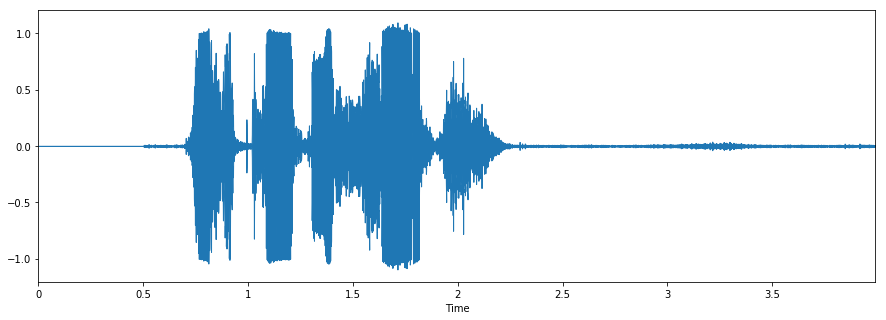

In [486]:
% pylab inline
import os
import pandas as pd
import librosa
import glob 

plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

In [487]:
#livedf= pd.DataFrame(columns=['feature'])
X, sample_rate = librosa.load('output10.wav', res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
featurelive = mfccs
livedf2 = featurelive

In [488]:
livedf2= pd.DataFrame(data=livedf2)

In [489]:
livedf2 = livedf2.stack().to_frame().T

In [490]:
livedf2

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,-18.203564,-21.471836,-22.52221,-21.712259,-22.264288,-20.707904,-21.726444,-21.76865,-24.302736,-22.250634,...,-24.273819,-24.639939,-24.929152,-24.43919,-25.210171,-24.740646,-22.311913,-22.579805,-22.31466,-21.552436


In [491]:
twodim= np.expand_dims(livedf2, axis=2)

In [492]:
livepreds = loaded_model.predict(twodim, 
                         batch_size=32, 
                         verbose=1)

1/1 [==============================] - 0s


In [493]:
livepreds

array([[  9.24052530e-22,   0.00000000e+00,   3.62402176e-26,
          1.30680162e-36,   4.47264152e-28,   1.00000000e+00,
          1.80208343e-30,   2.76873961e-27,   3.62227194e-23,
          1.67396652e-11]], dtype=float32)

In [494]:
livepreds1=livepreds.argmax(axis=1)

In [495]:
liveabc = livepreds1.astype(int).flatten()

In [496]:
livepredictions = (lb.inverse_transform((liveabc)))
livepredictions

array(['male_angry'], dtype=object)